In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
data = pd.read_csv("/content/Student Depression Dataset.csv")
data.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
print("Number of rows are: ",data.shape[0]) #rows
print("Number of columns are: ",data.shape[1]) #columns
data.duplicated().sum()

Number of rows are:  27901
Number of columns are:  18


0

In [ ]:
data.isnull().sum()

,0
id,0
Gender,0
Age,0
City,0
Profession,0
Academic Pressure,0
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


# Intentional Data Drop

In [ ]:
np.random.seed(42)
missing_indices = np.random.choice(data.index, size=int(0.01 * len(data)), replace=False)
data.loc[missing_indices, 'Financial Stress'] = np.nan

In [ ]:
# intentinal data drop
np.random.seed(42)
columns_to_corrupt = {
    'Age': 0.03,
    'Academic Pressure': 0.02
}
for column, rate in columns_to_corrupt.items():
    num_missing = int(rate * len(data))
    missing_indices = np.random.choice(data.index, size=num_missing, replace=False)
    data.loc[missing_indices, column] = np.nan

In [ ]:
data.isnull().sum()

,0
id,0
Gender,0
Age,837
City,0
Profession,0
Academic Pressure,558
Work Pressure,0
CGPA,0
Study Satisfaction,0
Job Satisfaction,0


<Axes: >

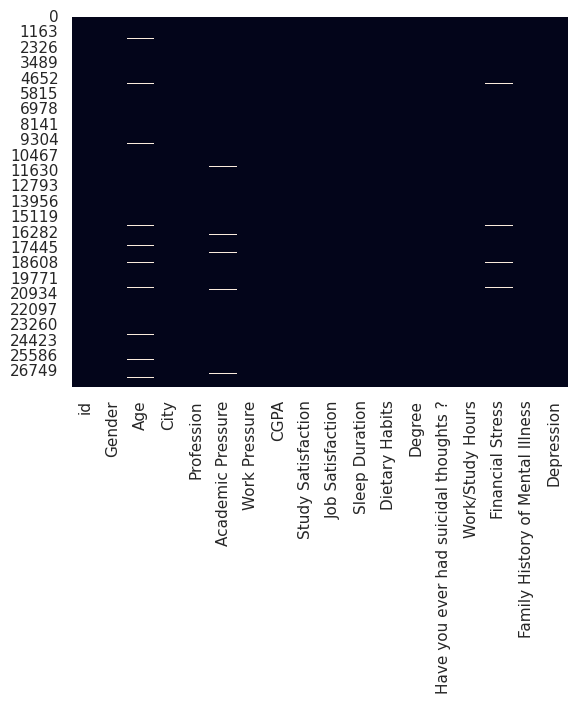

In [ ]:
sns.heatmap(data.isnull(), cbar=False)

# Data Visualisation

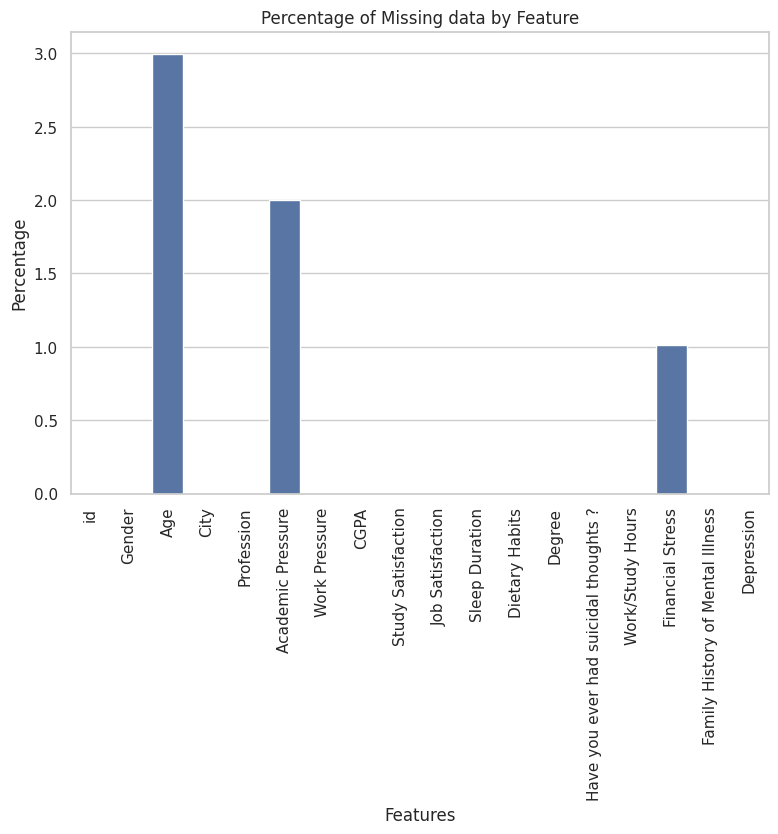

In [ ]:
# Calculate the percentage of missing data for each feature
missing_data= data.isnull().sum()
missing_data = missing_data.to_frame(name='Total')  # Convert Series to dataFrame
missing_data['Percentage'] = (missing_data['Total'] / len(data)) * 100

plt.figure(figsize=(9, 6))
sns.set(style="whitegrid")
sns.barplot(x=missing_data.index, y=missing_data['Percentage'], data=missing_data)
plt.title("Percentage of Missing data by Feature")
plt.xlabel("Features")
plt.ylabel("Percentage")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

Quantitatve


In [ ]:
# Separate columns into quantitative (numerical) and categorical
quantitative_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
# Display the feature types
print("Quantitative Features (Numerical):")
print(quantitative_features)
print("\nCategorical Features:")
print(categorical_features)

# unique value count
print("\nUnique Values in Categorical Features:")
for col in categorical_features:
    print(f"{col}: {data[col].nunique()} unique values")


Quantitative Features (Numerical):
['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Financial Stress', 'Depression']

Categorical Features:
['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Family History of Mental Illness']

Unique Values in Categorical Features:
Gender: 2 unique values
City: 52 unique values
Profession: 14 unique values
Sleep Duration: 5 unique values
Dietary Habits: 4 unique values
Degree: 28 unique values
Have you ever had suicidal thoughts ?: 2 unique values
Family History of Mental Illness: 2 unique values


# Data Preprocessing

In [ ]:
data = data.drop(['id'], axis=1) # dropping id

In [ ]:
data['Work Pressure'].value_counts()
data["Job Satisfaction"].value_counts()
data['Profession'].value_counts()

,count
Profession,
Student,27870
Architect,8
Teacher,6
Digital Marketer,3
Content Writer,2
Chef,2
Doctor,2
Pharmacist,2
Civil Engineer,1


In [ ]:
# Dropping these three features cause they have one unique value or no value at all
data = data.drop(['Profession'], axis=1)
data = data.drop(columns=['Work Pressure'])
data = data.drop(columns=['Job Satisfaction'])

In [ ]:
data.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,Visakhapatnam,5.0,8.97,2.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,Bangalore,2.0,5.90,5.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,Srinagar,3.0,7.03,5.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,Varanasi,3.0,5.59,2.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,Jaipur,4.0,8.13,3.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [ ]:
# REMOVING CITIES WITH LESS THAN 400 STUDENTS FOR AVOIDING EXTREME VALUES
cities_to_remove = data['City'].value_counts()[data['City'].value_counts() < 400]
data = data[~data['City'].isin(cities_to_remove.index)]
data['City'].value_counts()

,count
City,
Kalyan,1570
Srinagar,1372
Hyderabad,1340
Vasai-Virar,1290
Lucknow,1155
Thane,1139
Ludhiana,1111
Agra,1094
Surat,1078


In [ ]:
# Dropping vlaues Age more than 30 because the data is so small in that region
data = data.loc[data['Age'] <= 30]
data['Age'].value_counts()

,count
Age,
24.0,2186
20.0,2176
28.0,2069
29.0,1882
25.0,1716
21.0,1677
23.0,1607
18.0,1544
19.0,1516


In [ ]:
# Clearing unwanted data in Academic Pressure
data = data.loc[data['Academic Pressure'] > 0]
data['Academic Pressure'].value_counts()

,count
Academic Pressure,
3.0,5513
5.0,4916
4.0,3934
1.0,3385
2.0,2976


In [ ]:
# Clearing unwanted data in Study Satisfaction
data = data.loc[data['Study Satisfaction'] > 0]
data['Study Satisfaction'].value_counts()

,count
Study Satisfaction,
4.0,4602
2.0,4460
3.0,4233
1.0,4145
5.0,3282


# Giving numerical values to categorical data columns

In [ ]:
data['Sleep Duration'].value_counts()
data = data.loc[data['Sleep Duration'] != 'Others'] # dropping small data values
data['Sleep Duration'].value_counts()

,count
Sleep Duration,
Less than 5 hours,6197
7-8 hours,5474
5-6 hours,4565
More than 8 hours,4474


In [ ]:
data['Dietary Habits'].value_counts()
data = data.loc[data['Dietary Habits'] != 'Others'] # dropping small data values
data['Dietary Habits'].value_counts()

,count
Dietary Habits,
Unhealthy,7939
Moderate,7227
Healthy,5535


In [ ]:
data.loc[data['Gender'] == 'Male', 'Gender'] = 0
data.loc[data['Gender'] == 'Female', 'Gender'] = 1

In [ ]:
## CHANGING SLEEP DURATION TO NUMERICAL
data.loc[data['Sleep Duration'] == 'Less than 5 hours', 'Sleep Duration'] = 0
data.loc[data['Sleep Duration'] == '5-6 hours', 'Sleep Duration'] = 1
data.loc[data['Sleep Duration'] == '7-8 hours', 'Sleep Duration'] = 2
data.loc[data['Sleep Duration'] == 'More than 8 hours', 'Sleep Duration'] = 3
data['Sleep Duration'].value_counts()

,count
Sleep Duration,
0,6192
2,5471
1,4564
3,4474


In [ ]:
data.loc[data['Dietary Habits'] == 'Healthy', 'Dietary Habits'] = 0
data.loc[data['Dietary Habits'] == 'Unhealthy', 'Dietary Habits'] = 1
data.loc[data['Dietary Habits'] == 'Moderate', 'Dietary Habits'] = 2
data['Dietary Habits'].value_counts()

,count
Dietary Habits,
1,7939
2,7227
0,5535


# Dealing with categorical data with large unique values

In [ ]:
data['Degree'].unique()

array(['BSc', 'BCA', 'M.Tech', 'PhD', 'Class 12', 'B.Ed', 'M.Ed', 'MSc',
       'BHM', 'M.Pharm', 'MCA', 'MA', 'B.Pharm', 'B.Com', 'MD', 'BE',
       'BA', 'MBBS', 'B.Arch', 'LLM', 'B.Tech', 'BBA', 'M.Com', 'ME',
       'MBA', 'LLB', 'Others', 'MHM'], dtype=object)

In [ ]:
data.loc[data['Degree'].str.contains(r'BSc|BCA|B.Ed|BHM|B.Pharm|B.Com|BE|BA|B.Arch|B.Tech|BBA|LLB', regex=True), 'New_Degree'] = 'Graduated'
data.loc[data['Degree'].str.contains(r'MSc|MCA|M.Ed|M.Pharm|M.Com|ME|MA|M.Arch|M.Tech|MBA|LLM', regex=True), 'New_Degree'] = 'Post Graduated'
data.loc[data['Degree'] == 'Class 12', 'New_Degree'] = 'Higher Secondary'
data = data.loc[data['Degree'] != 'Others']
data['New_Degree'].value_counts()

,count
New_Degree,
Graduated,9314
Higher Secondary,5559
Post Graduated,4645


In [ ]:
data.loc[data['New_Degree'] == 'Graduated', 'New_Degree'] = 0
data.loc[data['New_Degree'] == 'Post Graduated', 'New_Degree'] = 1
data.loc[data['New_Degree'] == 'Higher Secondary', 'New_Degree'] = 2
data['New_Degree'].value_counts()

,count
New_Degree,
0,9314
2,5559
1,4645


In [ ]:
data['Have you ever had suicidal thoughts ?'].value_counts()

,count
Have you ever had suicidal thoughts ?,
Yes,13600
No,7074


In [ ]:
data.loc[data['Have you ever had suicidal thoughts ?'] == 'Yes', 'Have you ever had suicidal thoughts ?'] = 1
data.loc[data['Have you ever had suicidal thoughts ?'] == 'No', 'Have you ever had suicidal thoughts ?'] = 0
data['Have you ever had suicidal thoughts ?'].value_counts()

,count
Have you ever had suicidal thoughts ?,
1,13600
0,7074


In [ ]:
data.loc[data['Family History of Mental Illness'] == 'Yes', 'Family History of Mental Illness'] = 1
data.loc[data['Family History of Mental Illness'] == 'No', 'Family History of Mental Illness'] = 0
data['Family History of Mental Illness'].value_counts()

,count
Family History of Mental Illness,
0,10681
1,9993


# Filling the missing values or null values in the dataset using mean for quantative and mode for categorical data

In [ ]:
data.loc[:, 'Age'] = data['Age'].fillna(data['Age'].mean())

In [ ]:
mode_value = data['Academic Pressure'].mode()[0]  # Get the mode
data['Academic Pressure'] = data['Academic Pressure'].fillna(mode_value)

In [ ]:
data = data.dropna(subset=['Financial Stress'])

In [ ]:
data.isnull().sum()

,0
Gender,0
Age,0
City,0
Academic Pressure,0
CGPA,0
Study Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Degree,0
Have you ever had suicidal thoughts ?,0


In [ ]:
data['New_Degree'] = data['New_Degree'].fillna(data['New_Degree'].mode()[0])

<ipython-input-144-e5832296d343>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['New_Degree'] = data['New_Degree'].fillna(data['New_Degree'].mode()[0])


In [ ]:
data.isnull().sum()

,0
Gender,0
Age,0
City,0
Academic Pressure,0
CGPA,0
Study Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Degree,0
Have you ever had suicidal thoughts ?,0


In [ ]:
data_data = data[['Gender', 'Age', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'New_Degree']]
data_data.head(3)

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
1,1,24.0,2.0,5.90,5.0,1,2,0,3.0,2.0,1,0,0
3,1,28.0,3.0,5.59,2.0,2,2,1,4.0,5.0,1,1,0
4,1,25.0,4.0,8.13,3.0,1,2,1,1.0,1.0,0,0,1


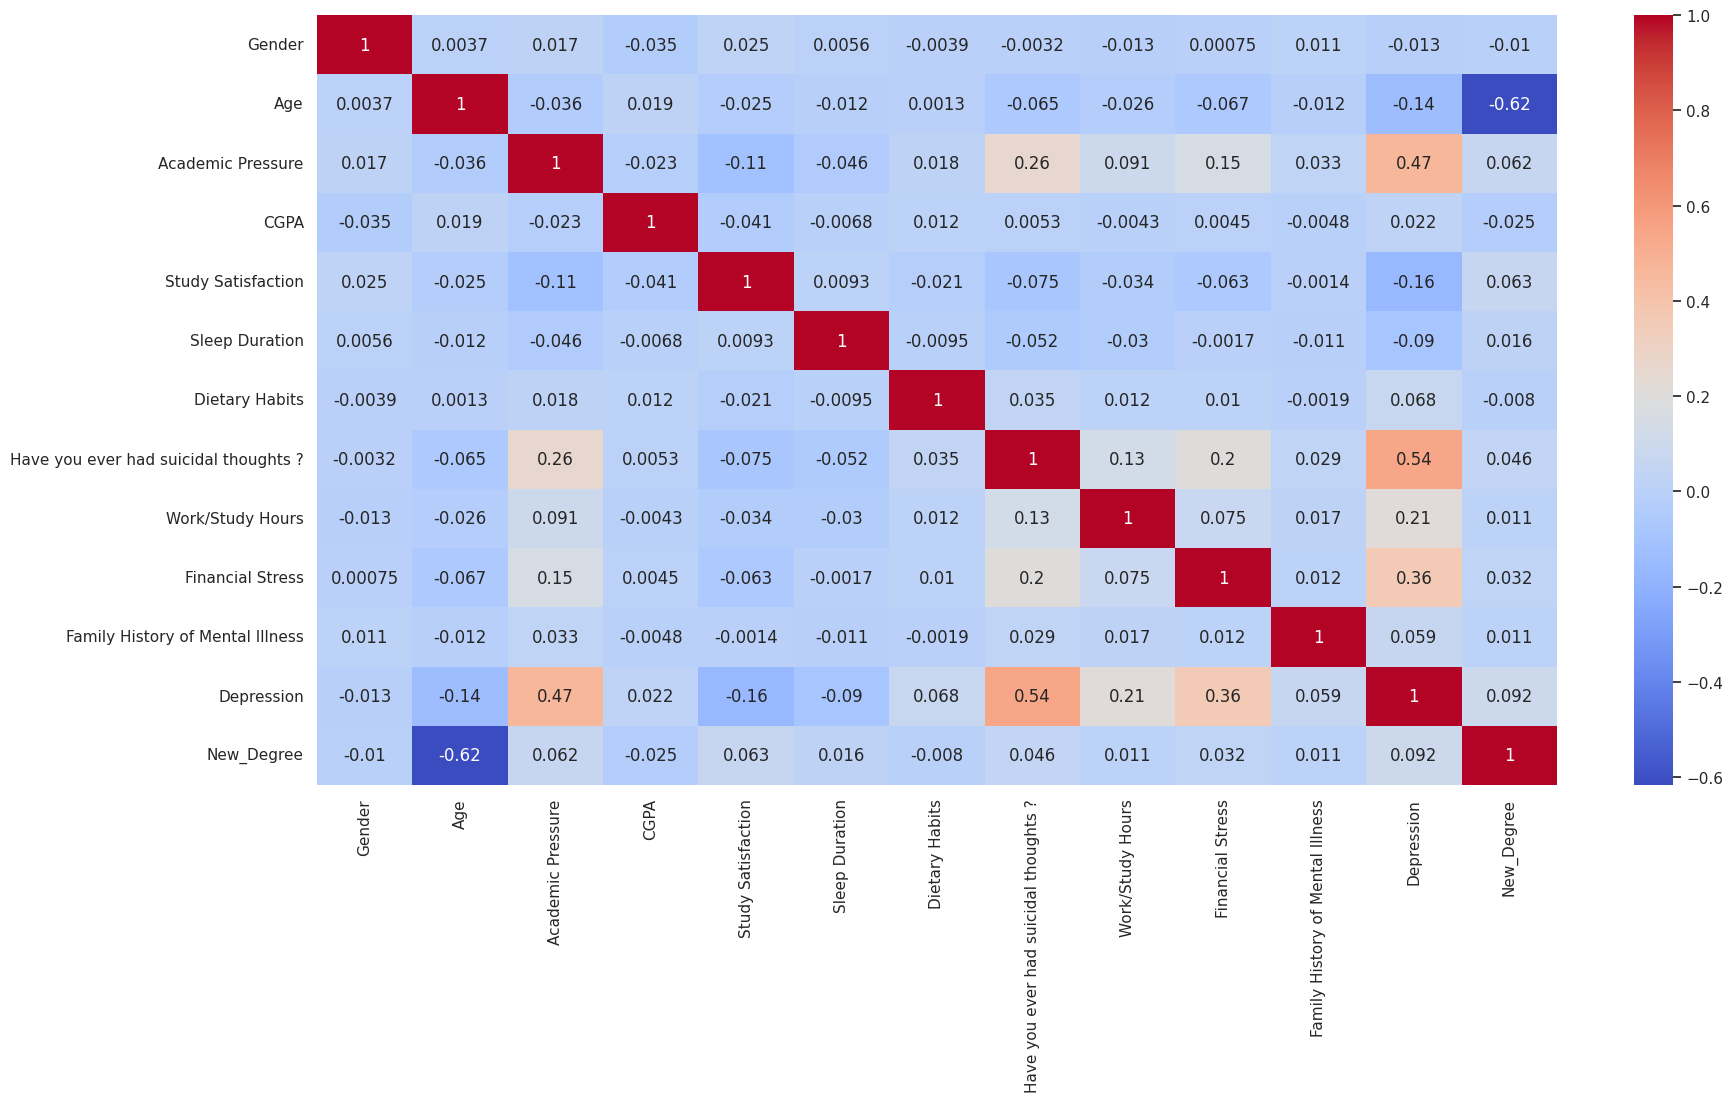

In [ ]:
# PLOTTING THE CORRELATION MATRIX
plt.figure(figsize=(20, 10))
sns.heatmap(data_data.corr(), annot=True, cmap='coolwarm')
plt.show()

# Imbalace in the target data value

In [ ]:
class_counts = data_data['Depression'].value_counts()

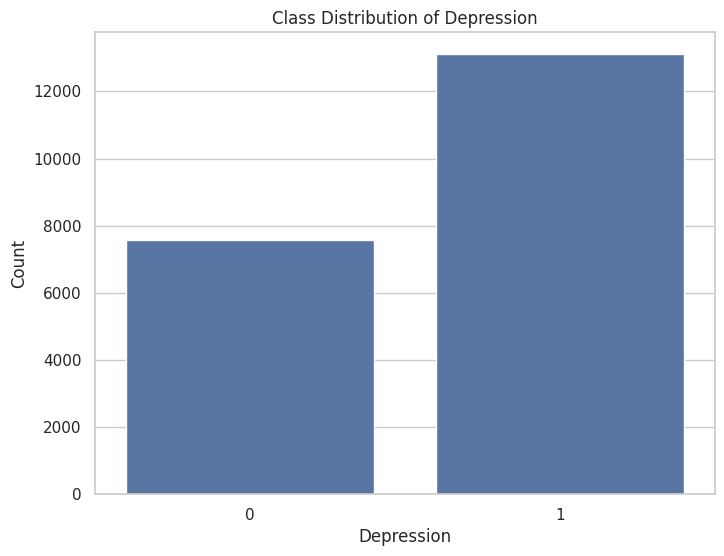

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Depression', data=data_data)
plt.title('Class Distribution of Depression')
plt.xlabel('Depression')
plt.ylabel('Count')
plt.show()

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(data[['City']])
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['City']))
## ADJUSTING THE INDEX
encoded_df.index = data.index
data_encoded = pd.concat([data, encoded_df], axis=1)

## CHECKING THE NEW DF
data_encoded.columns

Index(['Gender', 'Age', 'City', 'Academic Pressure', 'CGPA',
       'Study Satisfaction', 'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'New_Degree', 'City_Agra', 'City_Ahmedabad', 'City_Bangalore',
       'City_Bhopal', 'City_Chennai', 'City_Delhi', 'City_Faridabad',
       'City_Ghaziabad', 'City_Hyderabad', 'City_Indore', 'City_Jaipur',
       'City_Kalyan', 'City_Kanpur', 'City_Kolkata', 'City_Lucknow',
       'City_Ludhiana', 'City_Meerut', 'City_Mumbai', 'City_Nagpur',
       'City_Nashik', 'City_Patna', 'City_Pune', 'City_Rajkot',
       'City_Srinagar', 'City_Surat', 'City_Thane', 'City_Vadodara',
       'City_Varanasi', 'City_Vasai-Virar', 'City_Visakhapatnam'],
      dtype='object')

In [ ]:
data_encoded = data_encoded.drop(['City', 'Degree'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Splitting the data into features and target
X = data_encoded.drop('Depression', axis=1).values  # Features
y = data_encoded['Depression'].values  # Target

# Splitting the data into train and test sets with 70% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalizing the data features using Standard Scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models to be trained
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Train each model and print the accuracy
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy*100:.2f}%")

Logistic Regression Accuracy: 83.81%
Decision Tree Accuracy: 77.44%
K-Nearest Neighbors Accuracy: 80.62%
Naive Bayes Accuracy: 75.78%


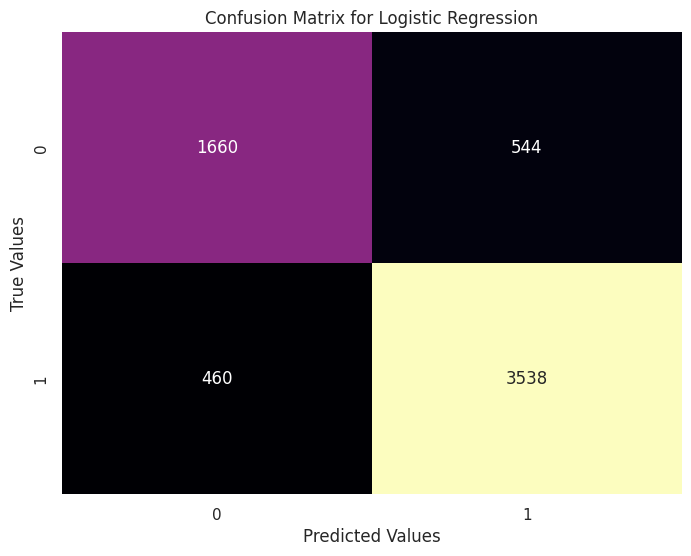

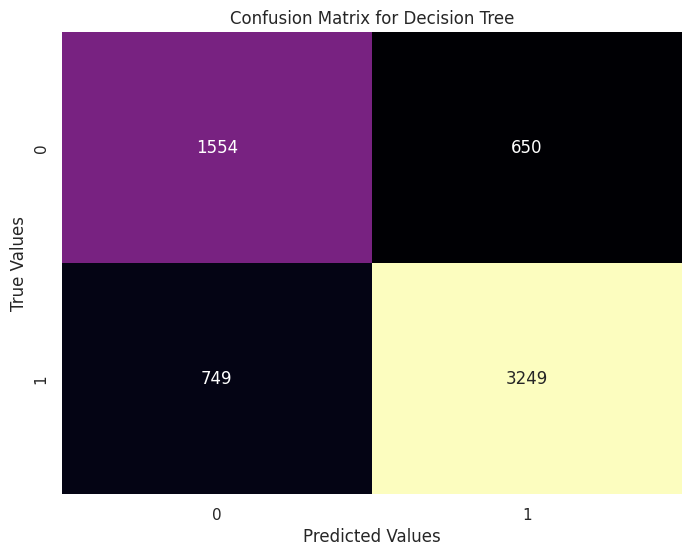

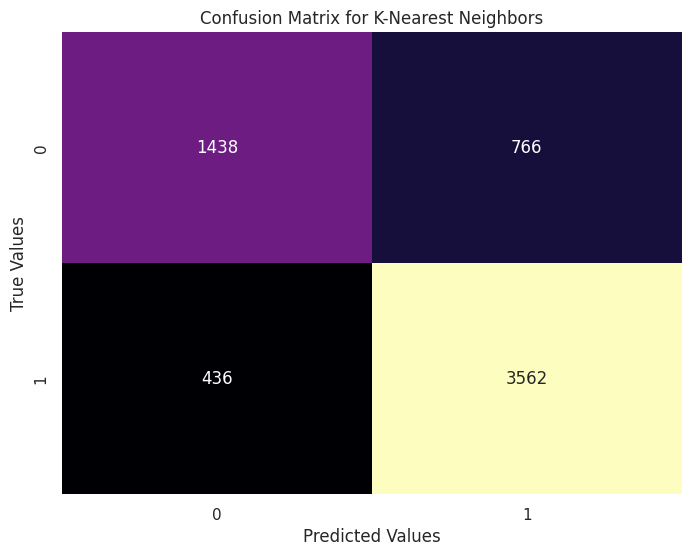

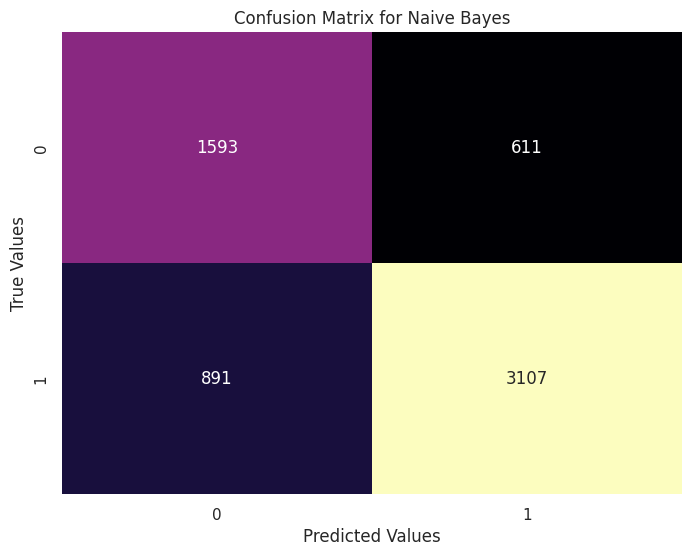

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

# Define the models you want to implement
selected_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Iterate over each selected model
for name, model in selected_models.items():
    # Training here
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    #plot it
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='magma', cbar=False)
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values')
    plt.show()

# Comparing Models

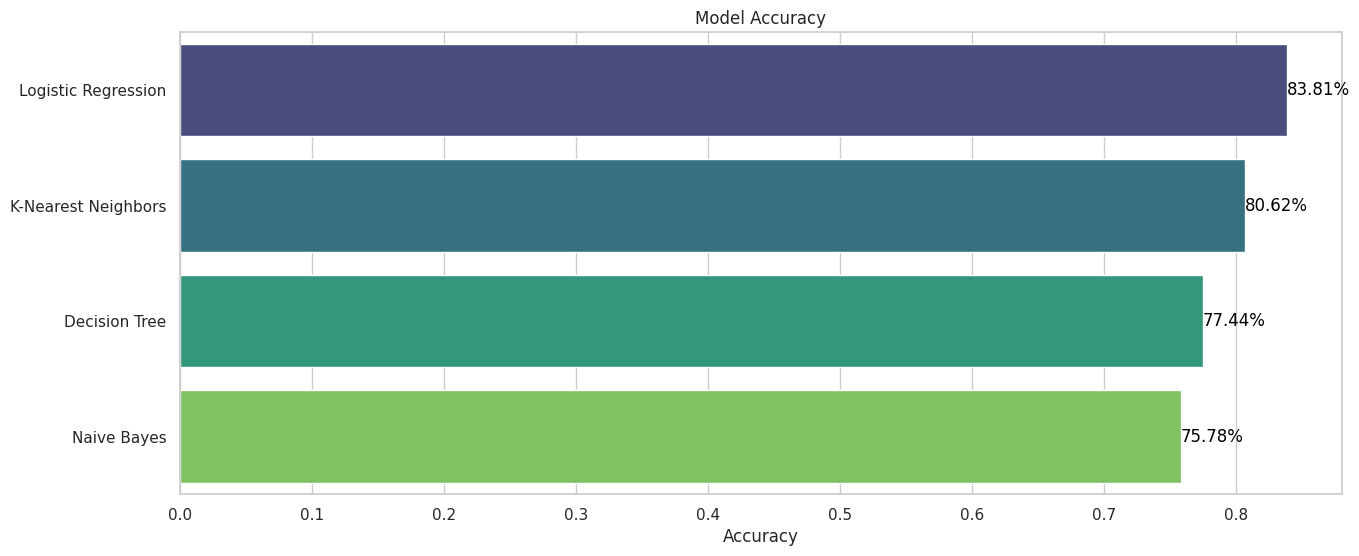

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
    }

# Train Models and calculate accuracy
accuracy_results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_results[name] = accuracy

## ORDERING THE ACCURACY RESULTS FROM HIGHEST TO LOWEST
accuracy_results_ordened = dict(sorted(accuracy_results.items(), key=lambda item: item[1], reverse=True))


## PLOTTING THE ACCURACY OF EACH MODEL ORDERING BY HIGHEST ACCURACY AND ADDING THE ACCURACY VALUE ABOVE THE BARS
plt.figure(figsize=(15, 6))
sns.barplot(x=list(accuracy_results_ordened.values()),
            y=list(accuracy_results_ordened.keys()),
            palette='viridis')
plt.xlabel('Accuracy')
plt.title('Model Accuracy')

## LABELS
for i, v in enumerate(accuracy_results_ordened.values()):
    plt.text(v, i, f'{v*100:.2f}%', color='black', va='center')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


results = []

# Train the models and calculate precision and recall
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    results.append({
        "Model": name,
        "Precision": precision,
        "Recall": recall
    })

# Create a DataFrame to display the results
results_df = pd.DataFrame(results)

# Display the table
print(results_df)

                 Model  Precision    Recall
0  Logistic Regression   0.836983  0.838117
1        Decision Tree   0.776958  0.774428
2  K-Nearest Neighbors   0.803229  0.806192
3          Naive Bayes   0.766595  0.757820


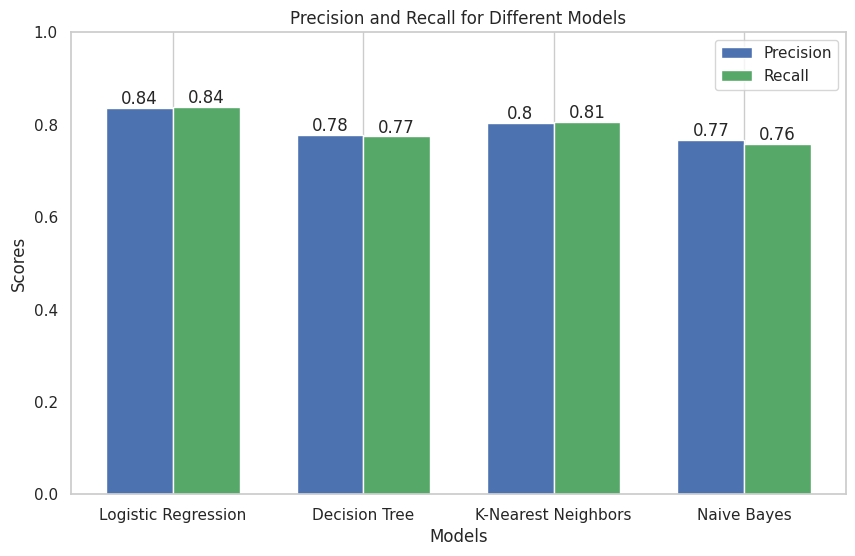

In [ ]:
bar_width = 0.35
index = np.arange(len(results_df))

fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(index, results_df['Precision'], bar_width, label='Precision', color='b')
bars2 = ax.bar(index + bar_width, results_df['Recall'], bar_width, label='Recall', color='g')

ax.set_xlabel('Models')
ax.set_ylabel('Scores')
ax.set_title('Precision and Recall for Different Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(results_df['Model'])
ax.legend()


for bar in bars1:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

for bar in bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), ha='center', va='bottom')

plt.ylim(0, 1)
plt.grid(axis='y')
plt.show()